In [1]:
from rl_qoc import QuantumEnvironment, ChannelReward, QiskitConfig, QEnvConfig, ExecutionConfig, GateTarget, FidelityReward
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.circuit.library import RXGate, UGate, RZXGate, CXGate
from gymnasium.spaces import Box
import numpy as np
seed = 30980922
np.random.seed(seed)
params = ParameterVector("a", 1)
angle = np.random.uniform(-np.pi, np.pi, size=(1,))
angle = np.array([np.pi/2])
# gate = RXGate(*angle)
gate = CXGate()
target = GateTarget(gate, (0,))
def apply_qc(qc:QuantumCircuit, params, qreg):
    # qc.rzx(params[0], qreg[0], qreg[1])
    qc.rx(params[0], qreg[0])
    qc.cx(qreg[0], qreg[1])

action_space = Box(-np.pi, np.pi, shape=(1,))
backend_config = QiskitConfig(apply_qc)
exec = ExecutionConfig(sampling_paulis=10000, n_shots=1, batch_size=1, n_reps=list(range(1, 10)),
                       dfe_precision=(0.05, 0.05), seed=seed,
                       c_factor=1)
channel = ChannelReward()
fidelity = FidelityReward()
channel_config = QEnvConfig(target, backend_config, action_space, reward=channel, execution_config=exec)

fidelity_config = QEnvConfig(target, backend_config, action_space, reward=fidelity,execution_config=exec)

fidelity_env = QuantumEnvironment(fidelity_config)
channel_env = QuantumEnvironment(channel_config)

/Users/arthurostrauss/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/Coding_projects/Quantum_Optimal_Control/rl_qoc/helpers/__init__.py:9: UserWarning: pulse_utils is not available
  warnings.warn("pulse_utils is not available")


In [97]:
print(gate.to_matrix())

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


In [98]:
angle


array([1.57079633])

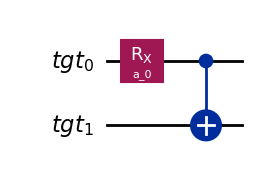

In [99]:
channel_env.circuit.draw("mpl")

In [100]:
data_no_dfe = channel.get_reward_data(channel_env.circuit, np.ones((1, 1)), channel_config)
channel.get_reward_with_primitive(data_no_dfe, channel_env.estimator)

DFE precision guarantee (0.05, 0.05)
Pauli sampling 8000


array([1.58218589])

In [101]:
data_no_dfe[0].fiducials

(PauliList(['ZZ', 'ZI', 'IZ']),
 SparsePauliOp(['ZI', 'ZZ', 'IZ'],
               coeffs=[0.01708333+0.j, 0.01708333+0.j, 0.01708333+0.j]))

In [102]:
data_no_dfe[1].fiducials

(PauliList(['ZZ', 'ZI', 'IZ']),
 SparsePauliOp(['ZI', 'ZZ', 'IZ'],
               coeffs=[-0.01616667+0.j, -0.01616667+0.j,  0.01616667+0.j]))

In [103]:
data_no_dfe[1].pauli_eigenstate

'|01>'

In [104]:
print(data_no_dfe.fiducials)
data_no_dfe.pubs[0]

[(PauliList(['ZZ', 'ZI', 'IZ']), SparsePauliOp(['ZI', 'ZZ', 'IZ'],
              coeffs=[0.01708333+0.j, 0.01708333+0.j, 0.01708333+0.j])), (PauliList(['ZZ', 'ZI', 'IZ']), SparsePauliOp(['ZI', 'ZZ', 'IZ'],
              coeffs=[-0.01616667+0.j, -0.01616667+0.j,  0.01616667+0.j])), (PauliList(['ZZ', 'ZI', 'IZ']), SparsePauliOp(['ZI', 'ZZ', 'IZ'],
              coeffs=[-0.018+0.j,  0.018+0.j, -0.018+0.j])), (PauliList(['ZZ', 'ZI', 'IZ']), SparsePauliOp(['ZI', 'ZZ', 'IZ'],
              coeffs=[ 0.017125+0.j, -0.017125+0.j, -0.017125+0.j])), (PauliList(['ZY']), SparsePauliOp(['YX'],
              coeffs=[0.016+0.j])), (PauliList(['ZY']), SparsePauliOp(['YX'],
              coeffs=[-0.01525+0.j])), (PauliList(['ZY']), SparsePauliOp(['YX'],
              coeffs=[-0.015875+0.j])), (PauliList(['ZY']), SparsePauliOp(['YX'],
              coeffs=[0.017625+0.j])), (PauliList(['ZX']), SparsePauliOp(['YY'],
              coeffs=[-0.01525+0.j])), (PauliList(['ZX']), SparsePauliOp(['YY'],
          

EstimatorPub(<(1,)>)

In [105]:
data_dfe = channel.get_reward_data(channel_env.circuit, np.ones((1, 1)), channel_config)
channel.get_reward_with_primitive(data_dfe, channel_env.estimator)

DFE precision guarantee (0.05, 0.05)
Pauli sampling 8000


array([0.85791643])

In [106]:
print(data_dfe.fiducials)
data_dfe.pubs[0].precision

[(PauliList(['ZZ', 'ZI', 'IZ']), SparsePauliOp(['ZI', 'ZZ', 'IZ'],
              coeffs=[0.01654167+0.j, 0.01654167+0.j, 0.01654167+0.j])), (PauliList(['ZZ', 'ZI', 'IZ']), SparsePauliOp(['ZI', 'ZZ', 'IZ'],
              coeffs=[-0.01808333+0.j, -0.01808333+0.j,  0.01808333+0.j])), (PauliList(['ZZ', 'ZI', 'IZ']), SparsePauliOp(['ZI', 'ZZ', 'IZ'],
              coeffs=[-0.01629167+0.j,  0.01629167+0.j, -0.01629167+0.j])), (PauliList(['ZZ', 'ZI', 'IZ']), SparsePauliOp(['ZI', 'ZZ', 'IZ'],
              coeffs=[ 0.0175+0.j, -0.0175+0.j, -0.0175+0.j])), (PauliList(['ZY']), SparsePauliOp(['YX'],
              coeffs=[0.018375+0.j])), (PauliList(['ZY']), SparsePauliOp(['YX'],
              coeffs=[-0.017375+0.j])), (PauliList(['ZY']), SparsePauliOp(['YX'],
              coeffs=[-0.017125+0.j])), (PauliList(['ZY']), SparsePauliOp(['YX'],
              coeffs=[0.017625+0.j])), (PauliList(['ZX']), SparsePauliOp(['YY'],
              coeffs=[-0.016125+0.j])), (PauliList(['ZX']), SparsePauliOp(['YY

np.float64(0.08247860988423225)

In [107]:
data2 = fidelity.get_reward_data(fidelity_env.circuit, np.ones((1, 1)), fidelity_config)

In [108]:
data_dfe.id_coeff

np.float64(0.0625)

In [109]:
fidelity.get_reward_with_primitive(data2, fidelity_env.estimator)

array([[0.81612092]])

In [ ]:
channel_env.initial_reward_fit(0.0*np.ones((1, 1)), reward_method=["fidelity", "channel"],
                          execution_config=ExecutionConfig(batch_size=1, n_reps= list(range(1, 30)),
                           dfe_precision=(0.05, 0.05), seed=seed, c_factor=1))


Number of repetitions: 1
Number of repetitions: 2
Number of repetitions: 3
Number of repetitions: 4
Number of repetitions: 5
Number of repetitions: 6
Number of repetitions: 7
Number of repetitions: 8
Number of repetitions: 9
Number of repetitions: 10
Number of repetitions: 11
Number of repetitions: 12
Number of repetitions: 13
Number of repetitions: 14
Number of repetitions: 15
Number of repetitions: 16
Number of repetitions: 17
Number of repetitions: 18
Number of repetitions: 19
Number of repetitions: 20
Number of repetitions: 21
Number of repetitions: 22
Number of repetitions: 23
Number of repetitions: 24
Number of repetitions: 25
Number of repetitions: 26
Number of repetitions: 27
Number of repetitions: 28
Number of repetitions: 29
Found parameters (fidelity method): [1.e-10 1.e-10 1.e-10]
Number of repetitions: 1
DFE precision guarantee (0.0005, 0.0005)
Pauli sampling 8000000000


In [95]:
data_dfe.total_shots

2957

In [41]:
data_dfe[0].observables

[SparsePauliOp(['Y'],
               coeffs=[-0.166423+0.j])]